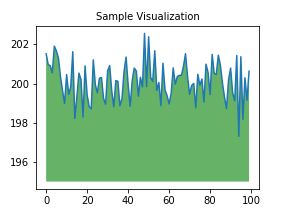

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:

!pip install langchain langchain-community pypdf beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.6/329.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

# PDF load karein
loader_pdf = PyPDFLoader("lecture_notes.pdf")
pages = loader_pdf.load()

# Output display karein
print(f"Total Pages in PDF: {len(pages)}")
print("-" * 30)
print("Content of First Page (Sample):")
print(pages[0].page_content[:500])

Total Pages in PDF: 2
------------------------------
Content of First Page (Sample):
ADVANCED FRONTEND DEVELOPMENT – PROJECT 
PROPOSAL 
 
 
 
Group Members Name: Mahwish Naeem, Hifza Ahmad, Ashar Abdullah 
 
Sap ID: 70151507, 70145816, 70148630


In [ ]:
from langchain_community.document_loaders import WebBaseLoader

# Web content load karein
url = "https://python.langchain.com/docs/introduction/"
loader_web = WebBaseLoader(url)
web_docs = loader_web.load()

# Metadata aur content check karein
print(f"Source URL: {web_docs[0].metadata['source']}")
print("-" * 30)
print("Web Content Sample:")
print(web_docs[0].page_content[1000:1500])

Source URL: https://python.langchain.com/docs/introduction/
------------------------------
Web Content Sample:
pplications powered by LLMs. With under 10 lines of code, you can connect to OpenAI, Anthropic, Google, and more. LangChain provides a pre-built agent architecture and model integrations to help you get started quickly and seamlessly incorporate LLMs into your agents and applications.
We recommend you use LangChain if you want to quickly build agents and autonomous applications. Use LangGraph, our low-level agent orchestration framework and runtime, when you have more advanced needs that require


In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV rows ko documents mein convert karein
loader_csv = CSVLoader(file_path='Student.csv')
csv_docs = loader_csv.load()

# Sample row inspect karein
print(f"Total Rows Loaded: {len(csv_docs)}")
print("-" * 30)
print("Sample Document (First Row):")
print(csv_docs[0].page_content)

Total Rows Loaded: 5
------------------------------
Sample Document (First Row):
Student_ID: 70161608
Name: Amna
Age: 23
Marks_Math: 68
Marks_Science: 98


In [ ]:
import pandas as pd

# Teeno loaders ka comparison
comparison = [
    {"Loader": "PyPDFLoader", "Format": "PDF Pages", "Metadata": list(pages[0].metadata.keys())},
    {"Loader": "WebBaseLoader", "Format": "HTML/Text", "Metadata": list(web_docs[0].metadata.keys())},
    {"Loader": "CSVLoader", "Format": "Structured Rows", "Metadata": list(csv_docs[0].metadata.keys())}
]

df = pd.DataFrame(comparison)
display(df)

,Loader,Format,Metadata
0,PyPDFLoader,PDF Pages,"[producer, creator, creationdate, author, modd..."
1,WebBaseLoader,HTML/Text,"[source, title, description, language]"
2,CSVLoader,Structured Rows,"[source, row]"
